In [59]:
# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
#importando CSV
df = pd.read_csv('dados/estado-de-residencia-do-declarante.csv',sep=';')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 43 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Ano-Calendário                                                  372 non-null    float64
 1   Estado                                                          372 non-null    object 
 2   Quantidade de Declarantes                                       372 non-null    float64
 3   Rendimentos Tributáveis                                         604 non-null    object 
 4   Rendimentos sujeitos a Tributação Exclusiva                     604 non-null    object 
 5   Rendimentos Isentos                                             604 non-null    object 
 6   Dedução Previdenciária Total                                    604 non-null    object 
 7   Deduções Previdência Oficial                         

In [62]:
df.head()

,Ano-Calendário,Estado,Quantidade de Declarantes,Rendimentos Tributáveis,Rendimentos sujeitos a Tributação Exclusiva,Rendimentos Isentos,Dedução Previdenciária Total,Deduções Previdência Oficial,Deduções Previdenciárias RRA,Deduções Previdência Privada e FAPI,...,Valores Pagos com Previdência Complementar de Natureza Pública,Valores Pagos com FAPI,Despesas com Instrução,Despesas Médicas,Pensão Alimentícia Judicial,Despesas com Pensão Alimentícia Escritural,Despesas com Profissionais Liberais,Despesas com Arrendamento Rural,Outras Despesas,Doações Efetuadas
0,2020.0,Acre,78776.0,"5558,002361","490,5578157","1124,686847","308,558081","287,4089838","0,13148434","21,01761287",...,"2,10843082","6,00809787","132,4330936","256,6954091","71,65883065","4,22117606","5,15388009","0,2964","21,23540442","45,85951567"
1,2020.0,Alagoas,247097.0,"15799,57826","1526,068992","5339,154968","926,9070316","831,6732624","1,07630339","94,15746581",...,"7,73860901","19,78162849","385,9449644","1072,730025","131,4101646","14,43879038","30,20255997","3,06588262","117,8035022","251,5340071"
2,2020.0,Amapá,81326.0,"6241,158054","482,5054224","858,2699315","405,3834374","384,3461809","0,11586886","20,92138765",...,"2,07867444","4,27742969","228,9187364","426,8952054","122,2976748","7,13571786","6,84639564","0,1496","18,31175154","22,29899358"
3,2020.0,Amazonas,350943.0,"21790,57133","2063,528471","7966,616198","1198,664796","1089,562958","0,95361973","108,1482176",...,"5,85929019","23,0018491","665,4182138","1021,234728","244,0924471","26,79924638","27,6621397","0,0499","131,4684686","262,9748401"
4,2020.0,Bahia,1224526.0,"71616,77657","8631,494084","29579,89769","4297,536441","3675,741721","4,6751881","617,1195319",...,"31,59677537","158,7812582","2263,292057","4878,565167","522,1615731","66,94185648","199,5593237","6,35866715","633,1255802","986,8489329"


#### Limpeza de dados


In [63]:
#Contando nulos
df.isnull().sum()

Ano-Calendário                                                    238
Estado                                                            238
Quantidade de Declarantes                                         238
Rendimentos Tributáveis                                             6
Rendimentos sujeitos a Tributação Exclusiva                         6
Rendimentos Isentos                                                 6
Dedução Previdenciária Total                                        6
Deduções Previdência Oficial                                      238
Deduções Previdenciárias RRA                                      238
Deduções Previdência Privada e FAPI                               238
Deduções com Dependentes                                            6
Deduções com Instrução                                              6
Deduções com despesas Médicas                                       6
Dedução de Livro Caixa                                              6
Deduções  com Pensão

In [64]:
#Excluindo nulos
df.dropna(inplace=True)

In [65]:
estados = ['Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará',
       'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão',
       'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Paraná',
       'Paraíba', 'Pará', 'Pernambuco', 'Piauí', 'Rio Grande do Norte',
       'Rio Grande do Sul', 'Rio de Janeiro', 'Rondônia', 'Roraima',
       'Santa Catarina', 'Sergipe', 'São Paulo', 'Tocantins']

df.loc[~df['Estado'].isin(estados)]

,Ano-Calendário,Estado,Quantidade de Declarantes,Rendimentos Tributáveis,Rendimentos sujeitos a Tributação Exclusiva,Rendimentos Isentos,Dedução Previdenciária Total,Deduções Previdência Oficial,Deduções Previdenciárias RRA,Deduções Previdência Privada e FAPI,...,Valores Pagos com Previdência Complementar de Natureza Pública,Valores Pagos com FAPI,Despesas com Instrução,Despesas Médicas,Pensão Alimentícia Judicial,Despesas com Pensão Alimentícia Escritural,Despesas com Profissionais Liberais,Despesas com Arrendamento Rural,Outras Despesas,Doações Efetuadas
27,2020.0,Não identificado,28668.0,"1223,055437","491,7758798","2092,380856","79,07632185","70,32598084","0,04903029","8,70131072",...,"2,93464061","1,5307458","42,31917936","47,90314498","13,77897347","2,14886552","15,65496587","0,015","30,78499448","92,65143687"
55,2019.0,Não identificado,30682.0,"1315,830481","688,7291638","2346,116311","77,84445227","66,07216964","0,0078408","11,76444183",...,"2,8612556","2,46052851","54,53682285","51,83531086","10,64422222","2,61333143","14,61534903","0,0273","29,73521239","56,9365259"
83,2018.0,Não identificado,32178.0,"1326,252945","728,9854627","2017,928744","80,71535203","68,127384","0,02239038","12,56557765",...,"1,07742074","2,44865529","55,91317748","53,15127338","12,10366085","4,75037352","15,72583312","0,0058","26,37477408","47,14046463"
97,2017.0,Não se aplica,254579.0,"15453,51404","2124,149225","7182,366397","778,1600669","673,8146622","0,45315309","103,8922516",...,"0,95290384","33,98545581","501,6207599","1014,153055","141,5584467","14,0136984","51,93884404","2,95031517","115,3801079","273,7606886"
139,2016.0,Não identificado,820381.0,"45677,3458","7345,189303","25818,50622","2153,578682","1851,342467","1,29819364","300,9380205",...,"3,01290457","94,90765312","1497,219208","2668,115083","469,5968972","57,31228653","177,3849706","5,0899781","515,72041","1291,390808"


In [66]:
#Excluindo linhas sem estado
df.drop(index=[27,55,83,97,139],inplace=True)

#### Preparação dos dados

In [67]:
df.columns

Index(['Ano-Calendário', 'Estado', 'Quantidade de Declarantes',
       'Rendimentos Tributáveis',
       'Rendimentos sujeitos a Tributação Exclusiva', 'Rendimentos Isentos',
       'Dedução Previdenciária Total', 'Deduções Previdência Oficial',
       'Deduções Previdenciárias RRA', 'Deduções Previdência Privada e FAPI',
       'Deduções com Dependentes', 'Deduções com Instrução',
       'Deduções com despesas Médicas', 'Dedução de Livro Caixa',
       'Deduções  com Pensão Alimentícia Total',
       'Deduções com Pensão Alimentícia Judicial',
       'Deduções com Pensão Alimentícia Escritural',
       'Deduções com Pensão Alimentícia RRA', 'Desconto Padrão',
       'Base de Cálculo (RTL)', 'Imposto Devido', 'Dedução de Incentivo',
       'Imposto Devido 1', 'Imposto Devido RRA', 'Imposto Devido Total',
       'Imposto Pago', 'Imposto a Pagar', 'Imposto a Restituir',
       'Dívidas   e Ônus', 'Doações e Heranças Recebidas', 'Bens e Direitos',
       'Previdência Complementar (VGBL)',

In [68]:
#Filtrando colunas de interesse
colunas = [0,1,2,3,24,29,30,35,36,37,40,42]
dados = df.iloc[:,colunas]

In [69]:
#Removendo vírgulas e pontos
dados.replace(',','',regex=True,inplace=True)

C:\Users\Silvio\AppData\Local\Temp\ipykernel_12212\781130513.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados.replace(',','',regex=True,inplace=True)


In [70]:
#Convertendo tipos
dados['Ano-Calendário'] = dados['Ano-Calendário'].astype('Int64')
dados['Quantidade de Declarantes'] = dados['Quantidade de Declarantes'].astype('Int64')

C:\Users\Silvio\AppData\Local\Temp\ipykernel_12212\3007468826.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['Ano-Calendário'] = dados['Ano-Calendário'].astype('Int64')
C:\Users\Silvio\AppData\Local\Temp\ipykernel_12212\3007468826.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['Quantidade de Declarantes'] = dados['Quantidade de Declarantes'].astype('Int64')


In [71]:
#Filtrando 2020
dados = dados[dados['Ano-Calendário']==2020]

In [72]:
#Criando coluna Região
estados_regioes = {
    'Acre': 'Norte',
    'Alagoas': 'Nordeste',
    'Amapá': 'Norte',
    'Amazonas': 'Norte',
    'Bahia': 'Nordeste',
    'Ceará': 'Nordeste',
    'Distrito Federal': 'Centro-Oeste',
    'Espírito Santo': 'Sudeste',
    'Goiás': 'Centro-Oeste',
    'Maranhão': 'Nordeste',
    'Mato Grosso': 'Centro-Oeste',
    'Mato Grosso do Sul': 'Centro-Oeste',
    'Minas Gerais': 'Sudeste',
    'Pará': 'Norte',
    'Paraíba': 'Nordeste',
    'Paraná': 'Sul',
    'Pernambuco': 'Nordeste',
    'Piauí': 'Nordeste',
    'Rio de Janeiro': 'Sudeste',
    'Rio Grande do Norte': 'Nordeste',
    'Rio Grande do Sul': 'Sul',
    'Rondônia': 'Norte',
    'Roraima': 'Norte',
    'Santa Catarina': 'Sul',
    'São Paulo': 'Sudeste',
    'Sergipe': 'Nordeste',
    'Tocantins': 'Norte'
}
dados['Região'] = dados['Estado'].map(estados_regioes)

In [73]:
dados

,Ano-Calendário,Estado,Quantidade de Declarantes,Rendimentos Tributáveis,Imposto Devido Total,Doações e Heranças Recebidas,Bens e Direitos,Despesas com Instrução,Despesas Médicas,Pensão Alimentícia Judicial,Despesas com Arrendamento Rural,Doações Efetuadas,Região
0,2020,Acre,78776,5558002361,590456976,5023546027,1228455972,1324330936,2566954091,7165883065,02964,4585951567,Norte
1,2020,Alagoas,247097,1579957826,1623581856,3145160908,4650222476,3859449644,1072730025,1314101646,306588262,2515340071,Nordeste
2,2020,Amapá,81326,6241158054,6438686874,3513359161,4923931253,2289187364,4268952054,1222976748,01496,2229899358,Norte
3,2020,Amazonas,350943,2179057133,2190040986,330887918,5553245866,6654182138,1021234728,2440924471,00499,2629748401,Norte
4,2020,Bahia,1224526,7161677657,6874054715,1168562607,253823517,2263292057,4878565167,5221615731,635866715,9868489329,Nordeste
5,2020,Ceará,703969,4390747797,4391858463,766374181,1516455858,1335907058,2746853545,4494486924,007917625,4321106678,Nordeste
6,2020,Distrito Federal,761579,762135048,1056422272,2226486055,3224058733,2344333566,5228426147,8149427501,309246186,8247649301,Centro-Oeste
7,2020,Espírito Santo,583955,3405241505,3251109412,8862455502,1579139549,9342791569,2196145264,2581575242,109949852,6179470021,Sudeste
8,2020,Goiás,1001607,5733354074,5359343739,221735948,3007015523,1456900324,3506832915,3726298317,173929476,66238138,Centro-Oeste
9,2020,Maranhão,422019,2452038476,2195159773,2666570562,5071853819,8079059268,1535190125,1821682722,046152,183053614,Nordeste


#### Visualização de dados

In [74]:
regioes = dados['Região']
#Mudando tamanho de todas as fontes
plt.rcParams.update({'font.size': 6})

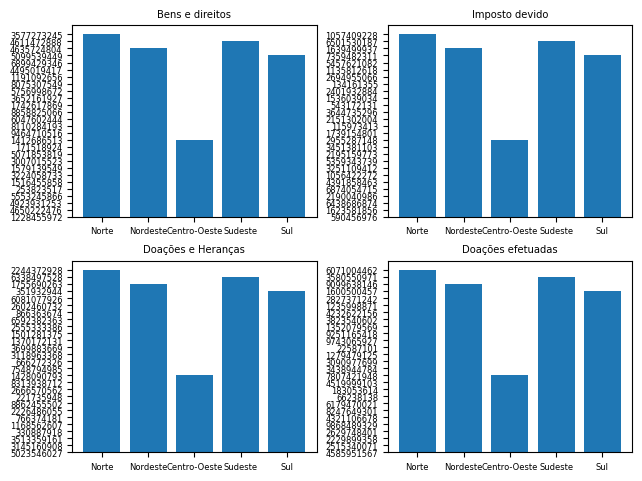

In [75]:
figure, axis = plt.subplots(2, 2)

#Bens e direitos
axis[0, 0].bar(regioes,dados['Bens e Direitos']) 
axis[0, 0].set_title("Bens e direitos")

# Imposto devido
axis[0, 1].bar(regioes, dados['Imposto Devido Total']) 
axis[0, 1].set_title("Imposto devido") 
  
# Doações e heranças
axis[1, 0].bar(regioes, dados['Doações e Heranças Recebidas']) 
axis[1, 0].set_title("Doações e Heranças") 
  
# Doações efetuadas
axis[1, 1].bar(regioes, dados['Doações Efetuadas']) 
axis[1, 1].set_title("Doações efetuadas")
#--------------------------------------------------------------------------> 
plt.tight_layout()

plt.show()

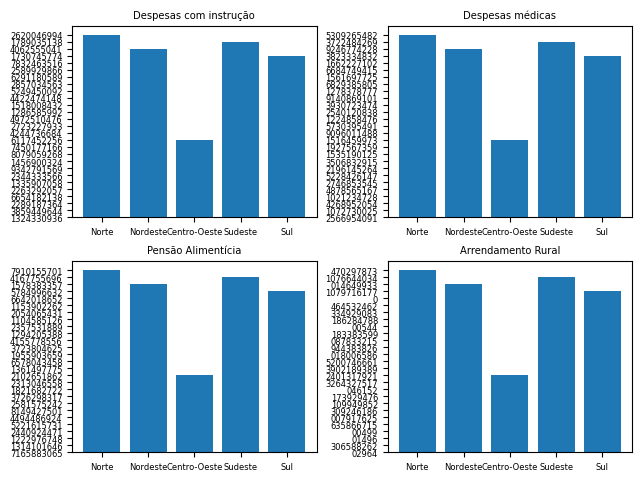

In [76]:
figure, axis = plt.subplots(2, 2)
#Despesas com Instrução
axis[0, 0].bar(regioes,dados['Despesas com Instrução']) 
axis[0, 0].set_title("Despesas com instrução")

#Despesas Médicas
axis[0, 1].bar(regioes, dados['Despesas Médicas']) 
axis[0, 1].set_title("Despesas médicas") 
  
#Pensão Alimentícia Judicial
axis[1, 0].bar(regioes, dados['Pensão Alimentícia Judicial']) 
axis[1, 0].set_title("Pensão Alimentícia") 
  
#Despesas com Arrendamento Rural
axis[1, 1].bar(regioes, dados['Despesas com Arrendamento Rural']) 
axis[1, 1].set_title("Arrendamento Rural")
#--------------------------------------------------------------------------> 
plt.tight_layout()

plt.show()

#### Exportação

In [77]:
dados.to_csv('dados/dados_impostos.csv',index = False)